Syafiq Muhammad A.(1301190377)


In [31]:
#import All Libraries
import os
import numpy as np
import cv2
import glob
import random

from IPython.display import Image
import matplotlib.pyplot as plt

# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mahotas
import cv2
import os
import h5py
import glob
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [32]:
#Define Dataset
dataPath = './dataset'
print(os.listdir('./dataset'))

['healthy', 'Worms']


In [33]:
#Change image to Array
def prepare_image(filepath):
    img = cv2.imread(filepath)
    img_resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
    img_result  = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    return img_result

In [34]:
#
dirList = glob.glob(dataPath+'/*') # list of all directories in dataPath
dirList.sort() # sorted in alphabetical order
print(dirList)

['./dataset\\Worms', './dataset\\healthy']


In [35]:
Y_data = []
for i in range(len(dirList)):
    fileList = glob.glob(dirList[i]+'/*')
    [Y_data.append(i) for file in fileList]
print(Y_data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [36]:
X_data = []
for i in range(len(dirList)):
    fileList = glob.glob(dirList[i]+'/*')
    [X_data.append(prepare_image(file)) for file in fileList]
X_data = np.asarray(X_data)
print(X_data.shape)

(265, 224, 224, 3)


In [37]:
## random shuffle
from sklearn.utils import shuffle
X_data, Y_data = shuffle(X_data, Y_data, random_state=0)

In [38]:
print(Y_data)

[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]


227


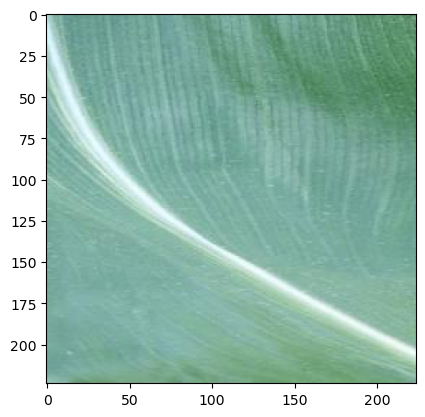

In [39]:
testNum = random.randint(0,len(X_data)-1)
print(testNum)
plt.imshow(X_data[testNum])

In [40]:
num_classes = len(dirList) 
labels = [dir.replace(dataPath+"/", "") for dir in dirList]
print(labels)

['./dataset\\Worms', './dataset\\healthy']


In [41]:
#Jumlah Healthy dan Hama
equilibre = []
[equilibre.append(Y_data.count(i)) for i in range(len(dirList))]
print(equilibre)

[103, 162]


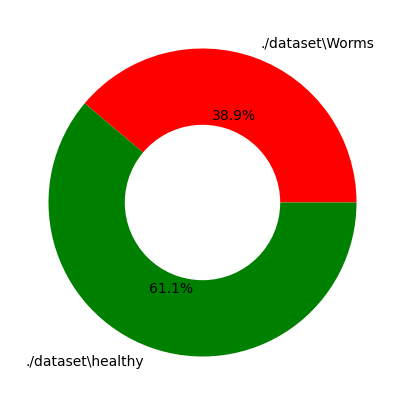

In [42]:
# plot the circle of value counts in dataset
plt.figure(figsize=(5,5))
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(equilibre, labels=labels, colors=['red','green','blue','yellow'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [43]:
# Data Normalisation
X_train = X_data / 255.0
print(X_train.shape)

(265, 224, 224, 3)


In [44]:
# # One-hot encoding
# Y_train = to_categorical(Y_data)
# print(Y_train.shape)

In [45]:
nsamples, nx, ny, nz  = X_train.shape
d2_train_dataset = X_train.reshape((nsamples,nx*ny*nz))

In [46]:
# train_test_split size
test_size = 0.30

# seed for reproducing same result 
seed = 9 
# split the training and testing data
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(d2_train_dataset),
                                                                                          np.array(Y_data),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

RANDOM FOREST

In [47]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# create the model - Random Forests
clf  = RandomForestClassifier()

# fit the training data to the model
clf.fit(trainDataGlobal, trainLabelsGlobal)

#print(clf.fit(trainDataGlobal, trainLabelsGlobal))

clf_pred = clf.predict(testDataGlobal)
#clf_pred = clf.predict(global_feature.reshape(1,-1))[0]
print(classification_report(testLabelsGlobal,clf_pred))
#print(confusion_matrix(trainLabelsGlobal,clf_pred))

#print(clf.predict(trainDataGlobal))

#print(clf.predict(global_feature.reshape(1,-1))[0])


              precision    recall  f1-score   support

           0       0.82      0.78      0.80        36
           1       0.83      0.86      0.84        44

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.82      0.82      0.82        80



In [48]:
clf_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1])

In [49]:
print(Y_data)

[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]


ADABOOST

In [50]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(trainDataGlobal, trainLabelsGlobal)


In [51]:
y_pred_ada = model.predict(testDataGlobal)

In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
print(classification_report(testLabelsGlobal,y_pred_ada))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        36
           1       0.81      0.89      0.85        44

    accuracy                           0.82        80
   macro avg       0.83      0.82      0.82        80
weighted avg       0.83      0.82      0.82        80



XGBOOST

In [53]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="reg:linear", random_state=42)
xgb_model.fit(trainDataGlobal, trainLabelsGlobal)

c:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:57:48] WARNING: c:\windows\temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='reg:linear', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [54]:
y_pred_xg = xgb_model.predict(testDataGlobal)
from sklearn.metrics import classification_report
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
print(classification_report(testLabelsGlobal,y_pred_xg))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        36
           1       0.81      0.89      0.85        44

    accuracy                           0.82        80
   macro avg       0.83      0.82      0.82        80
weighted avg       0.83      0.82      0.82        80

